In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import googlemaps
from datetime import datetime

ModuleNotFoundError: No module named 'googlemaps'

In [ ]:
data=pd.read_csv('../small_business/data/restaurants.csv')
data=data.drop(columns='Unnamed: 0')

In [ ]:
data.head(2)

## Exploration

### overall ratings 

(array([  1.,   0.,   0.,   1.,   3.,   8.,  21.,  83., 312., 223.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

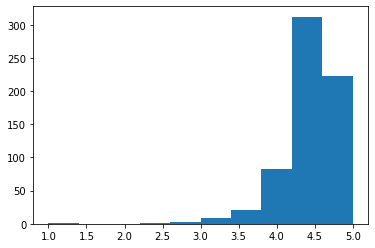

In [9]:
# Repartition of reviews
plt.hist(data.rating)

average number of reviews per store: 721.069018404908
Some outliers with many reviews: 


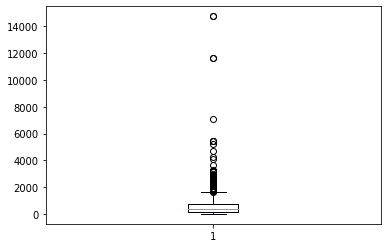

In [10]:
# number of reviews per store: 
plt.boxplot(data.review_count)

print('average number of reviews per store:', data.review_count.mean())
print('Some outliers with many reviews: ')

### Information about type of food

/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'brunch'),
  Text(1, 0, 'cafe'),
  Text(2, 0, 'mediterranean'),
  Text(3, 0, 'european'),
  Text(4, 0, 'chicken'),
  Text(5, 0, 'bar'),
  Text(6, 0, 'seafood'),
  Text(7, 0, 'south_america'),
  Text(8, 0, 'veggie_healthy'),
  Text(9, 0, 'bistro'),
  Text(10, 0, 'grill'),
  Text(11, 0, 'indian_nepalese'),
  Text(12, 0, 'portuguese'),
  Text(13, 0, 'pizza'),
  Text(14, 0, 'japanese'),
  Text(15, 0, 'pasta'),
  Text(16, 0, 'mexican'),
  Text(17, 0, 'africa_me'),
  Text(18, 0, 'burger'),
  Text(19, 0, 'italian'),
  Text(20, 0, 'asian'),
  Text(21, 0, 'pastry'),
  Text(22, 0, 'fast_food'),
  Text(23, 0, 'fado')])

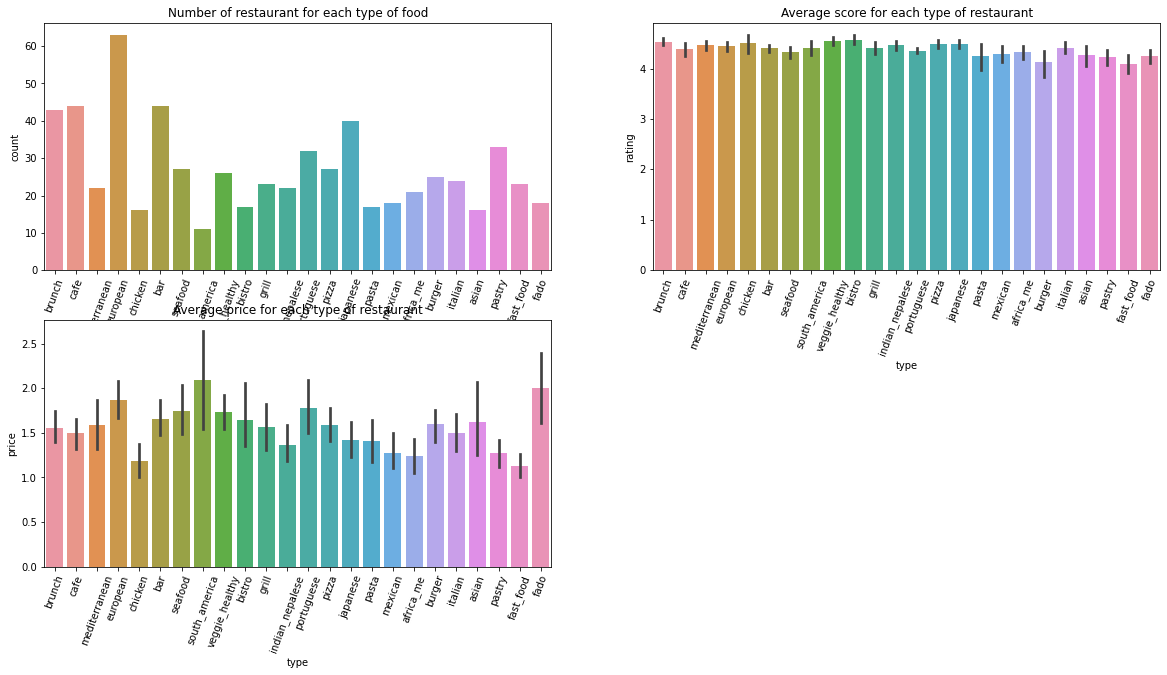

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Number of restaurant for each type of food')
sns.countplot(data.type)
plt.xticks(rotation=70)

plt.subplot(2,2,2)
plt.title('Average score for each type of restaurant')
sns.barplot(data.type, data.rating)
plt.xticks(rotation=70)

plt.subplot(2,2,3)
plt.title('Average price for each type of restaurant')
sns.barplot(data.type, data.price)
plt.xticks(rotation=70)

#plt.subplot(2,2,3)
#plt.title('Most common localization for each type of restaurant')
#data.groupby(data.type).mean()

### information about neighborhood

/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Graça'),
  Text(1, 0, 'Prazeres'),
  Text(2, 0, 'Santa Engrácia'),
  Text(3, 0, 'São Paulo'),
  Text(4, 0, 'Lapa'),
  Text(5, 0, 'Santa Catarina'),
  Text(6, 0, 'Alto do Pina'),
  Text(7, 0, 'Encarnação'),
  Text(8, 0, 'Santa Isabel'),
  Text(9, 0, 'Socorro'),
  Text(10, 0, 'Anjos'),
  Text(11, 0, 'Santo Estevão'),
  Text(12, 0, 'Pena'),
  Text(13, 0, 'Madalena'),
  Text(14, 0, 'Santos-o-Velho'),
  Text(15, 0, 'São Vicente de Fora'),
  Text(16, 0, 'Mercês'),
  Text(17, 0, 'Coração de Jesus'),
  Text(18, 0, 'São José'),
  Text(19, 0, 'Sacramento'),
  Text(20, 0, 'São Miguel'),
  Text(21, 0, 'Mártires'),
  Text(22, 0, 'São Cristóvão'),
  Text(23, 0, 'São Mamede'),
  Text(24, 0, 'Sé'),
  Text(25, 0, 'São Nicolau'),
  Text(26, 0, 'Campolide'),
  Text(27, 0, 'Santa Justa'),
  Text(28, 0, 'São Jorge de 

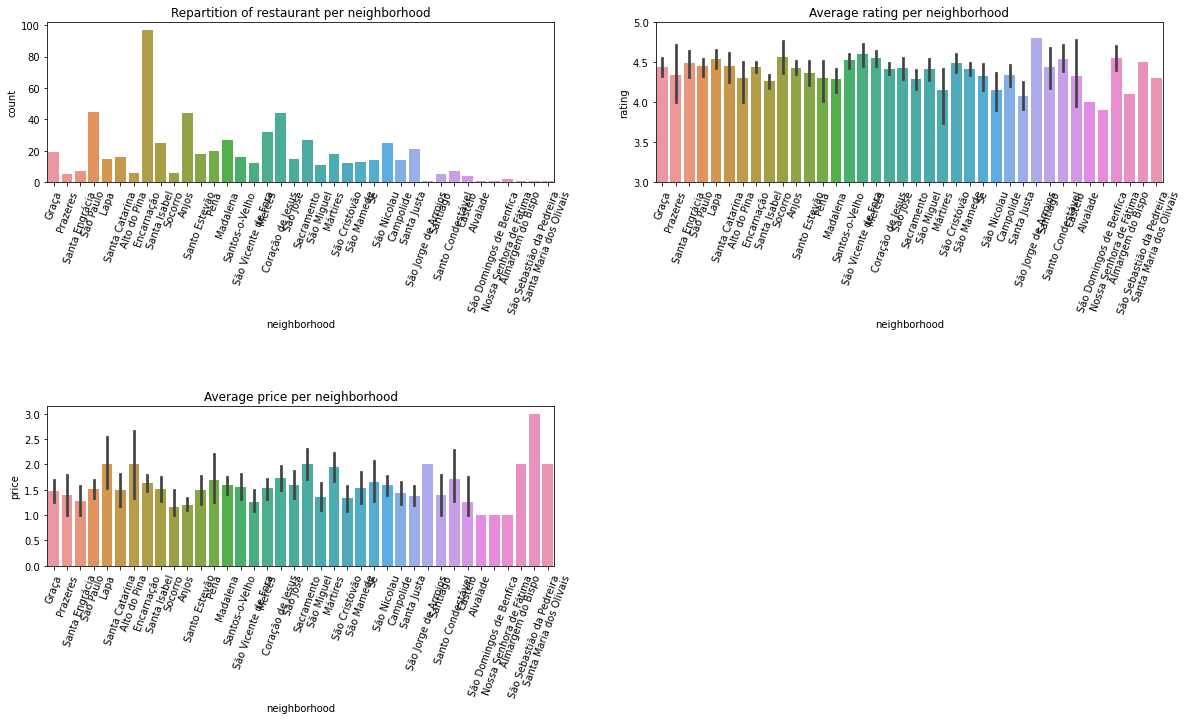

In [12]:
plt.figure(figsize=(20,10))

# Repartition of restaurant per neighborhood
plt.subplot(3,2,1)
plt.title('Repartition of restaurant per neighborhood')
sns.countplot(data.neighborhood)
plt.xticks(rotation=70)

# Average rating per neighborhood 
plt.subplot(3,2,2)
plt.title('Average rating per neighborhood')
sns.barplot(data.neighborhood, data.rating)
plt.xticks(rotation=70)
plt.ylim([3,5])
# Average price per neighborhood 
plt.subplot(3,2,5)
plt.title('Average price per neighborhood')
sns.barplot(data.neighborhood, data.price)
plt.xticks(rotation=70)

In [13]:
exct1=data[['neighborhood','takeaway', 'delivery', 'drive_through', 'curb_pickup']].groupby('neighborhood').mean()
exct1

,takeaway,delivery,drive_through,curb_pickup
neighborhood,,,,
Almargem do Bispo,0.000000,0.000000,0.000000,0.000000
Alto do Pina,0.666667,1.000000,0.333333,0.000000
Alvalade,1.000000,1.000000,0.000000,0.000000
Anjos,0.886364,0.568182,0.000000,0.022727
Campolide,0.785714,0.500000,0.000000,0.214286
Castelo,0.750000,0.250000,0.000000,0.000000
Coração de Jesus,0.750000,0.613636,0.068182,0.068182
Encarnação,0.680412,0.381443,0.020619,0.051546
Graça,0.736842,0.315789,0.052632,0.052632


### Correlation and pairplot

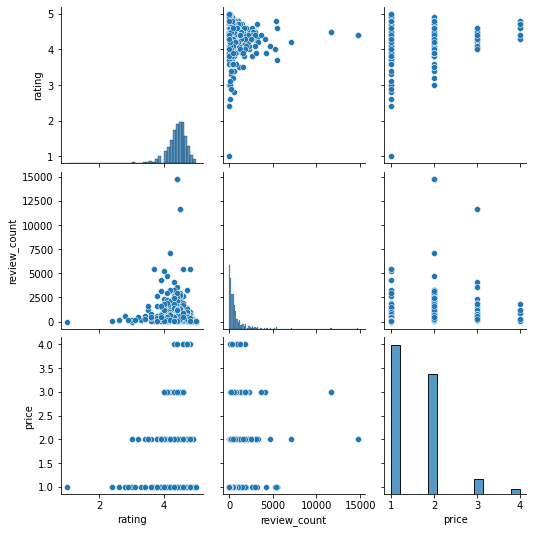

In [14]:
sns.pairplot(data[['rating', 'review_count', 'price']])

## Labels

In [15]:
data.label.value_counts()

['dine-in', 'takeaway', 'delivery']                      203
['dine-in', 'takeaway', 'no delivery']                   142
['dine-in', 'takeaway']                                  100
['dine-in', 'no delivery']                                53
['nan']                                                   32
['dine-in', 'takeaway', 'no-contact delivery']            16
['dine-in', 'no takeaway', 'no delivery']                 15
['dine-in', 'curbside pickup', 'delivery']                15
['dine-in', 'curbside pickup', 'no-contact delivery']     14
['dine-in']                                               13
['dine-in', 'curbside pickup', 'no delivery']             12
['dine-in', 'drive-through', 'no-contact delivery']       10
['dine-in', 'delivery']                                    8
['dine-in', 'drive-through', 'delivery']                   4
['dine-in', 'no takeaway']                                 3
['dine-in', 'drive-through']                               2
['dine-in', 'curbside pi

In [16]:
data.groupby('label').mean()
#regions = countries_df.groupby('Region')

,rating,review_count,price,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup
label,,,,,,,,,
"['dine-in', 'curbside pickup', 'delivery']",4.466667,1056.666667,1.666667,1.0,0.0,1.0,0.0,0.0,1.0
"['dine-in', 'curbside pickup', 'no delivery']",4.458333,336.750000,1.166667,1.0,0.0,0.0,0.0,1.0,1.0
"['dine-in', 'curbside pickup', 'no-contact delivery']",4.371429,599.500000,1.214286,1.0,0.0,1.0,0.0,0.0,1.0
"['dine-in', 'curbside pickup']",4.450000,351.000000,2.000000,1.0,0.0,0.0,0.0,0.0,1.0
"['dine-in', 'delivery', 'no takeaway']",4.900000,115.000000,1.000000,1.0,1.0,1.0,0.0,0.0,0.0
"['dine-in', 'delivery']",4.375000,459.625000,1.875000,1.0,0.0,1.0,0.0,0.0,0.0
"['dine-in', 'drive-through', 'delivery']",4.275000,1816.000000,1.500000,1.0,0.0,1.0,1.0,0.0,0.0
"['dine-in', 'drive-through', 'no delivery']",4.300000,406.000000,1.000000,1.0,0.0,0.0,1.0,1.0,0.0
"['dine-in', 'drive-through', 'no-contact delivery']",4.580000,2587.100000,1.500000,1.0,0.0,1.0,1.0,0.0,0.0


In [17]:
data23=data.groupby('takeaway').mean()
data23

,rating,review_count,price,dine_in,delivery,drive_through,no_del_exp,curb_pickup
takeaway,,,,,,,,
0,4.443114,692.299401,1.598802,0.802395,0.311377,0.101796,0.395210,0.263473
1,4.372577,730.975258,1.558763,0.993814,0.457732,0.000000,0.327835,0.000000


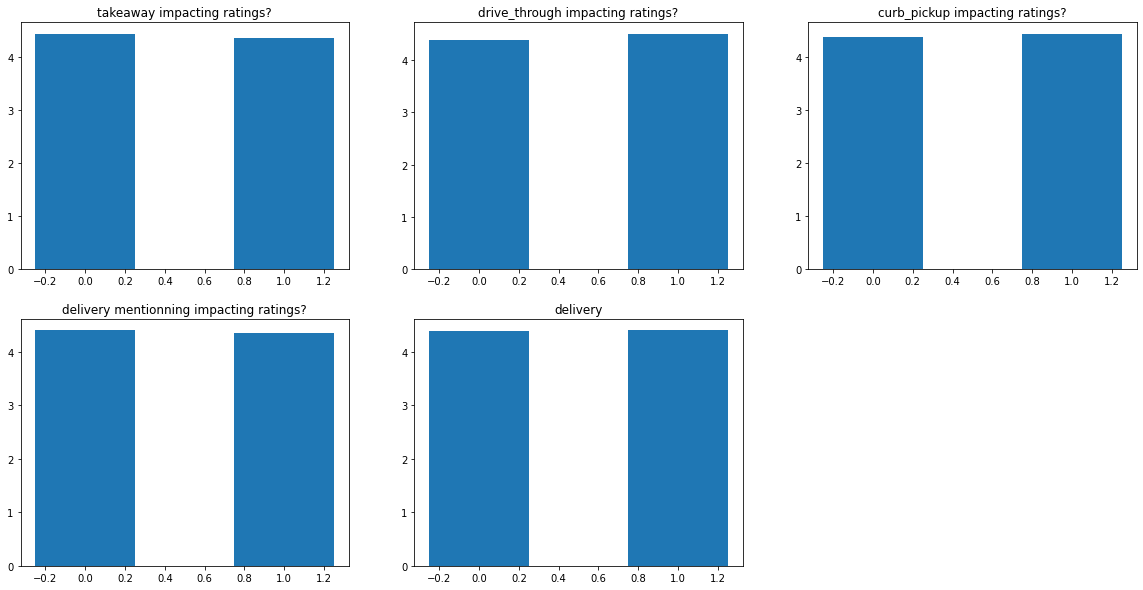

In [18]:
plt.figure(figsize=(20,10))

# takeaway
data23=data.groupby('takeaway').mean()
plt.subplot(2,3,1)
plt.title('takeaway impacting ratings?')
plt.bar(x= (0,1), height=data23.rating, width=0.5)
#plt.ylim=[4,5]

# drive_through
data24=data.groupby('drive_through').mean()
plt.subplot(2,3,2)
plt.title('drive_through impacting ratings?')
plt.bar(x= (0,1), height=data24.rating, width=0.5)
#plt.ylim=[4,5]

# curb_pickup
data25=data.groupby('curb_pickup').mean()
plt.subplot(2,3,3)
plt.title('curb_pickup impacting ratings?')
plt.bar(x= (0,1), height=data25.rating, width=0.5)
#plt.ylim=[4,5]

# Restaurant explicitely mentinning no delivery
data26=data.groupby('no_del_exp').mean()
plt.subplot(2,3,4)
plt.title('delivery mentionning impacting ratings?')
plt.bar(x= (0,1), height=data26.rating, width=0.5)
#plt.ylim=[4,5]

# delivery
data27=data.groupby('delivery').mean()
plt.subplot(2,3,5)
plt.title('delivery')
plt.bar(x= (0,1), height=data27.rating, width=0.5)
plt.ylim=[4,5]

## Mapping of coordinates of restaurant with folium 

## Get Latitude and Longitude

In [21]:
def latitude(column):
    key = pd.read_csv("../raw_data/api_key.csv", header=None)
    key = key.loc[0,0]
    gmaps = googlemaps.Client(key=key)
    # Geocoding an address
    geocode_result = gmaps.geocode(column)
    return float(geocode_result[0]['geometry']['location']['lat'])

def longitude(column):
    key = pd.read_csv("../raw_data/api_key.csv", header=None)
    key = key.loc[0,0]
    gmaps = googlemaps.Client(key=key)
    # Geocoding an address
    geocode_result = gmaps.geocode(column)
    return float(geocode_result[0]['geometry']['location']['lng'])

In [ ]:
data['latitude']=data.address.map(latitude)
data['longitude']=data.address.map(longitude)

In [19]:
import os 
import folium

In [20]:
latlonname= zip(data['latitude'],data['longitude'], data['name'], data['price'], data['rating'], data['type'])

m = folium.Map(location=[38.709223,  -9.1383], titles='small businesses', zoom_start=13.45)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], tooltip=str,popup= f'\n Name: {coord[2]} \n Price ($): {coord[3]} \n Rating:{coord[4]}\n Type:{coord[5]}').add_to(m)

m
#Put only 2 digit after coma

KeyError: 'latitude'

In [697]:
data.head(1)

,name,type,description,rating,review_count,price,address,label,latitude,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,brunch,"Hip brunch eatery serving savory toasts, banan...",4.8,1032.0,2,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",38.714376,-9.130176,1,1,1,0,1,0,1100-491,Lisboa,Graça


In [766]:
data_highprice=data[data['price'] > 2]
data_lowprice=data[data['price'] < 2]
data_graca=data[data['neighborhood'] == 'Graça']
best_restaurant_graca=data_graca[data['rating'] >=4.6]
best_restaurant_graca

your_data=data.copy()
#your_data=data[data['price'] > lower_price]
#your_data=your_data[your_data['price'] < higher_price]
#your_data=your_data[your_data['neighborhood'] == neighborhood]
your_data=your_data[your_data['type'] == type_of_food]
#your_data=your_data[your_data['rating'] > worse_rating]
your_data=your_data[your_data['rating'] < best_rating]


/var/folders/hd/90spmq897k17xxlkwtc99v200000gn/T/ipykernel_31132/1526572204.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  best_restaurant_graca=data_graca[data['rating'] >=4.6]


In [767]:
## Select the criteria you want to plot by selecting the data

## OPTION 1 - SELECT CRITERIA and use the your_data table , example= 
neighborhood='Encarnação'#select a neighborood whithin the list 
lower_price=1#select a pricerange
higher_price=3 #select a neighborood whithin the list 
worse_rating=4 #select worse rating and
best_rating =4.2 #select best rating
type_of_food='portuguese ' #select a type of food whithin the list 
# --> put your_data in data_use

#OPTION 2 - select a predefined table: 
#list of table: data_highprice, data_lowprice, data_graca, best_restaurant_graca

#Select the data you want among options above --> 
#data_use=best_restaurant_graca
data_use=your_data

latlonname= zip(data_use['latitude'],data_use['longitude'], data_use['name'], data_use['price'], data_use['rating'], data_use['type'])

m = folium.Map(location=[38.709223,  -9.1383], titles='small businesses', zoom_start=13.45)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], tooltip=str,popup= f'\n Name: {coord[2]} \n Price ($): {coord[3]} \n Rating:{coord[4]}\n Type:{coord[5]}').add_to(m)

m
#Put only 2 digit after coma